<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sns

### 1. Import the data

In [40]:
csv_file = 'ais.csv'
raw_data = pd.read_csv(csv_file)
raw_data.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

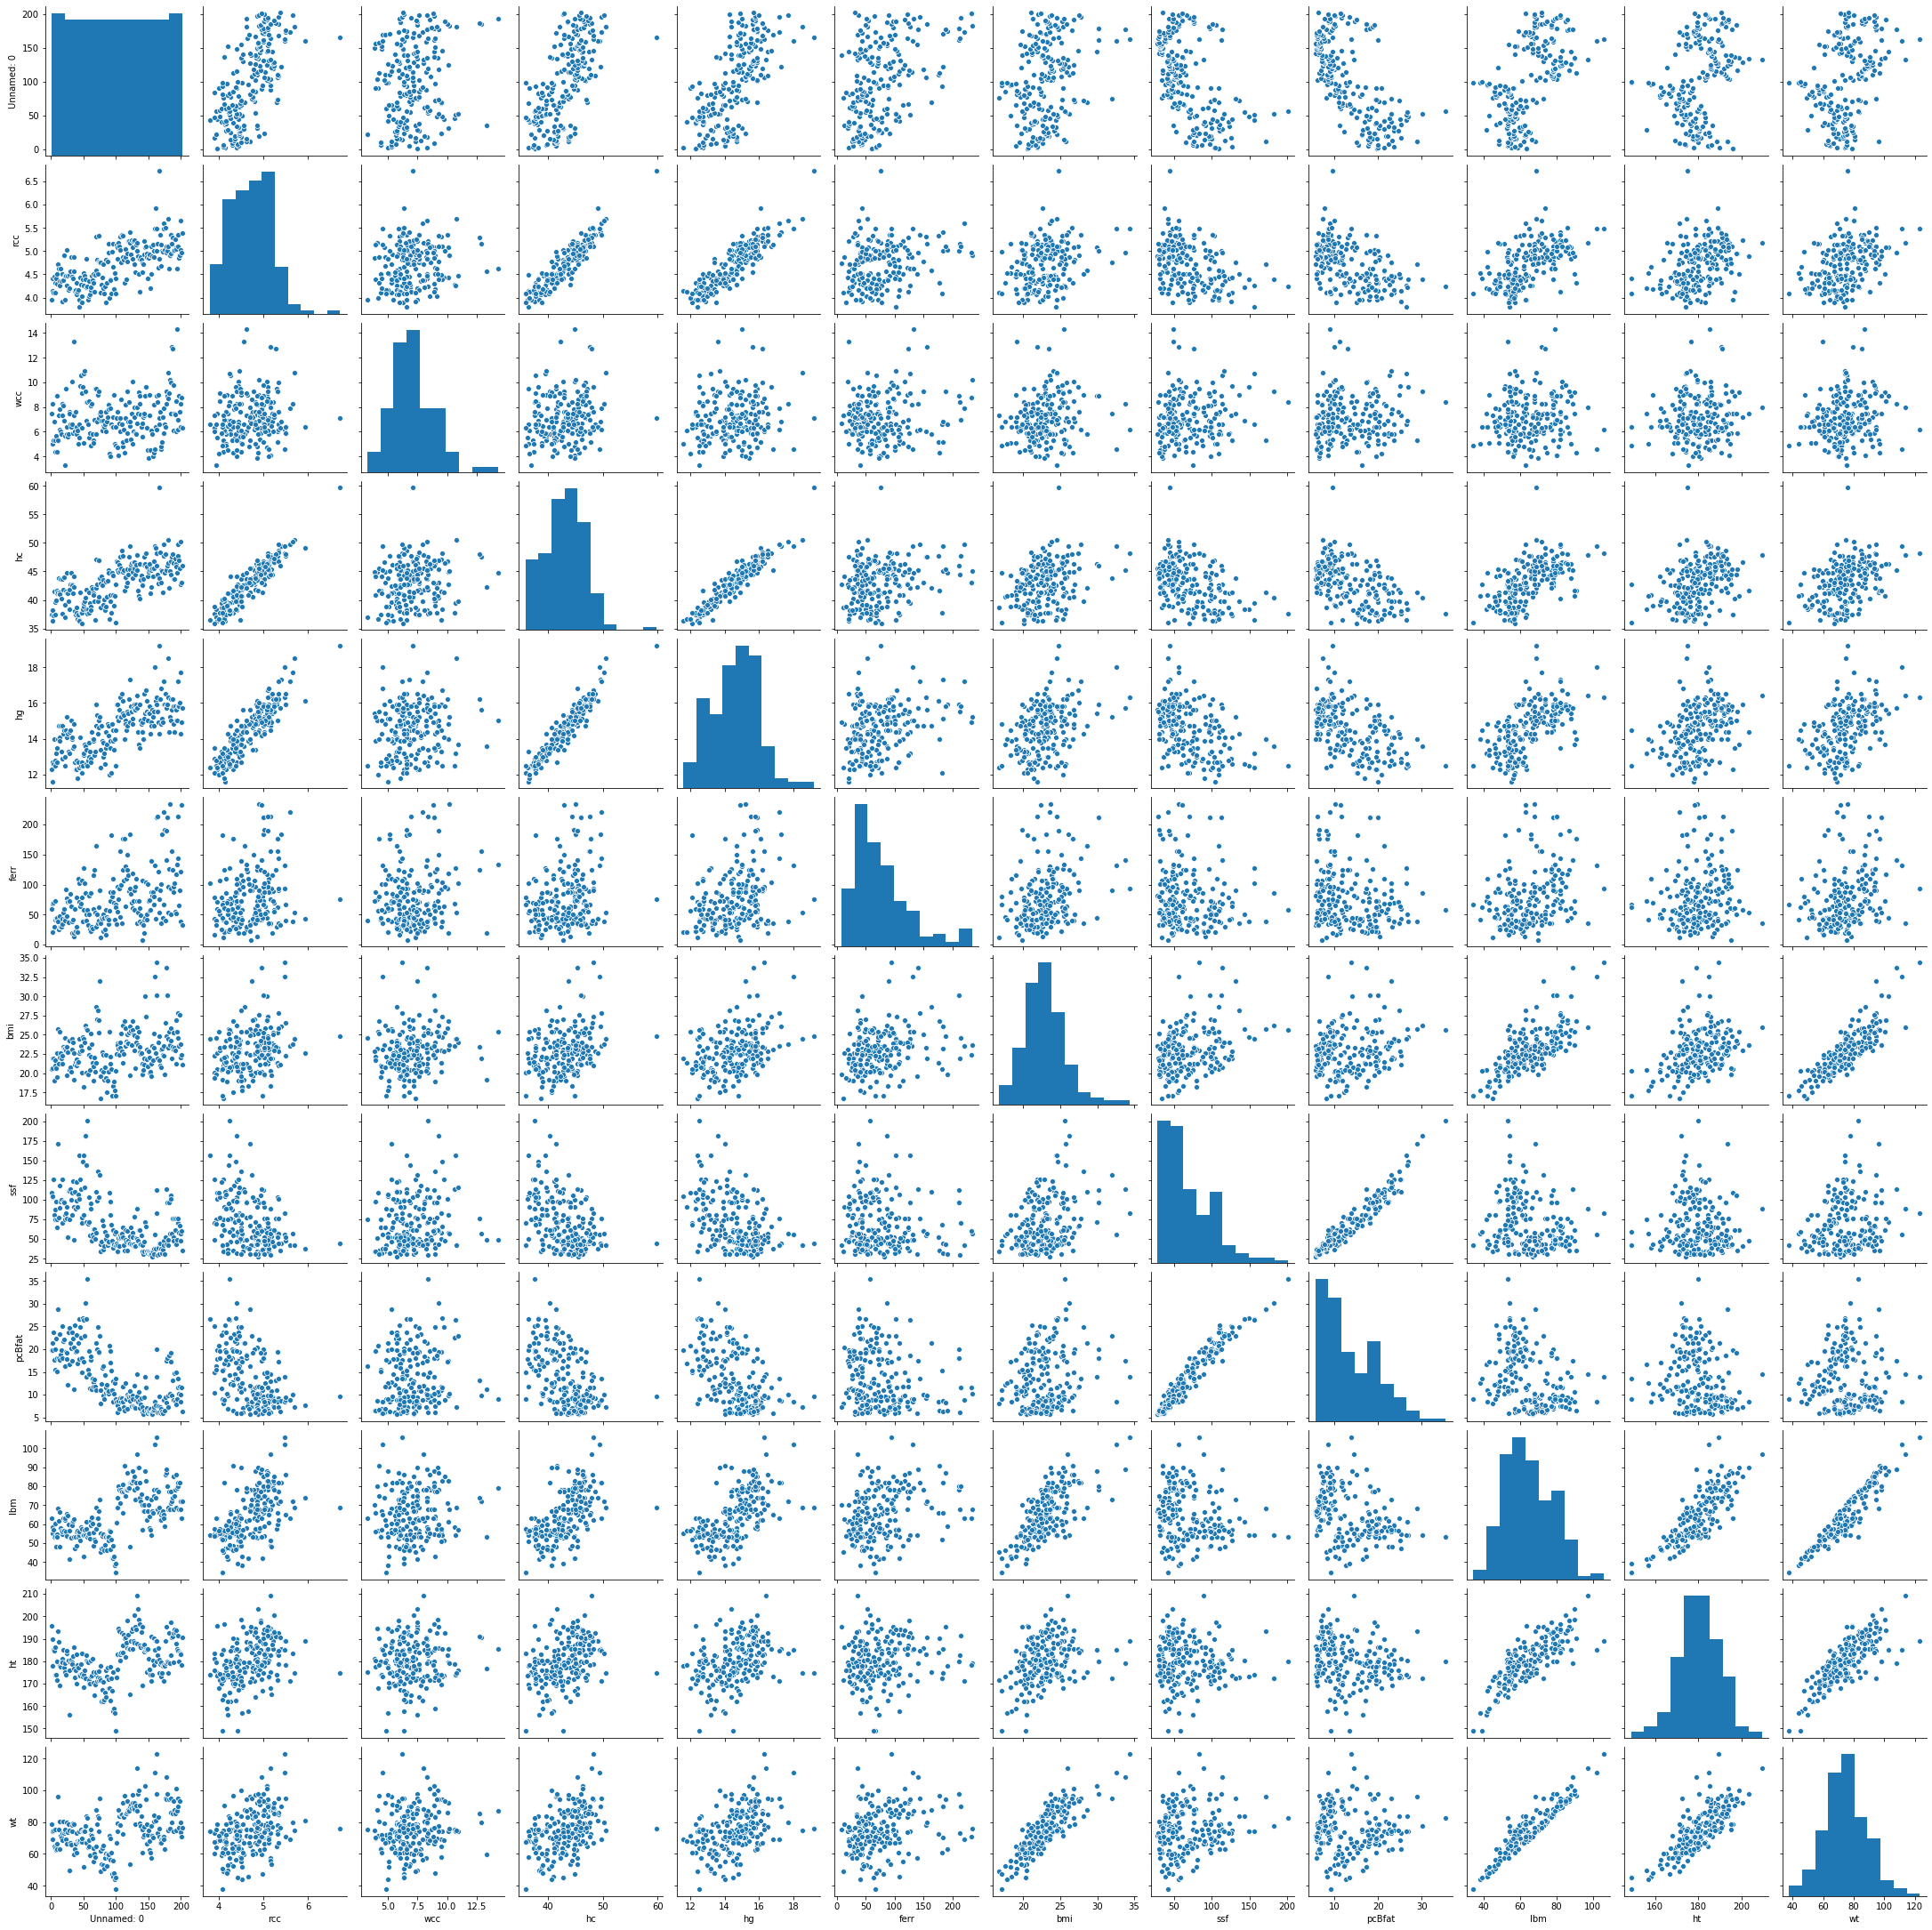

In [24]:
sns.pairplot(raw_data)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [41]:
# ANSWER
X = raw_data.drop(['sex','sport'], axis=1)

In [42]:
#put features on same scale
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
Xss = scaler.fit_transform(X) 

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [46]:
# ANSWER
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=2)
km2.fit(Xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models

In [47]:
# ANSWER
labels_2 = km2.labels_
print(labels_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [48]:
# ANSWER
# calculate sum of squared distance/distortion for a range of number of cluster
sum_of_squared = []
for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit(Xss)
    sum_of_squared.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

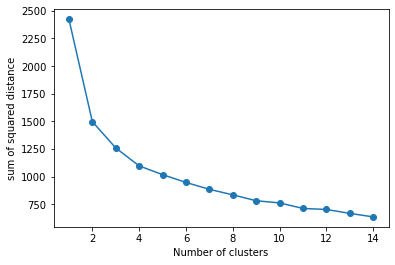

In [49]:
# ANSWER
# plot
plt.plot(range(1, 15), sum_of_squared, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared distance')
plt.show()

### 7. Plot `pcBfat` vs. `wt` using the clusters from each model.

- Plot actual classification of pcBfat vs wt using hue sex
- Plot predicted classification of pcBfat vs wt using hue label

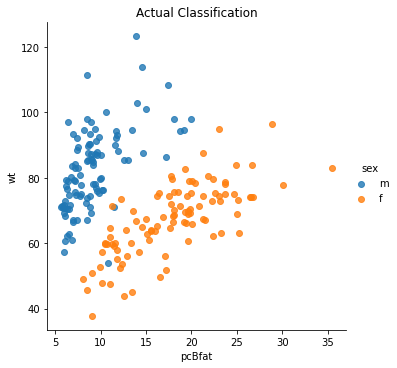

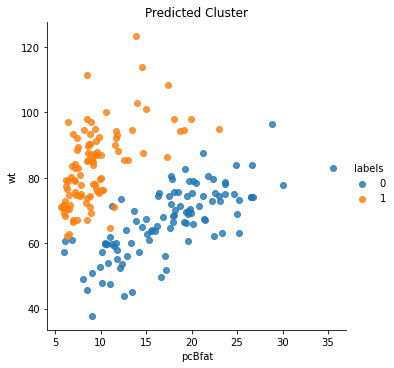

In [50]:
# ANSWER

labels = raw_data
labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=labels, hue='sex', hue_order=['m','f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')

plt.show();

[[ 7.93826923 74.80961538]
 [11.9698     93.252     ]
 [11.82595238 56.57142857]
 [21.04362069 72.80862069]]


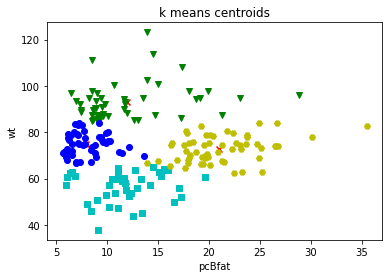

In [54]:
#Cluster of 4

x1 = np.array(raw_data['pcBfat'])
x2 = np.array(raw_data['wt'])

#create new plot and data
plt.plot()
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)
colors = ['b','g','c','y']
markers = ['o','v','s','H']

#KMeans algorithm
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')


for i, l in enumerate (kmeans_model.labels_):
    plt.plot(x1[i],x2[i], color=colors[l], marker=markers[l],ls='None' )
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



